In [1]:
!pip install spacy wordcloud matplotlib seaborn nltk
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nlp = spacy.load("ru_core_news_sm")
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
with open("Город для кита.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [5]:
#очистка текста от знаков препинания
def clean_text(text):
    text = re.sub(r'[^а-яА-ЯёЁ0-9а-я ]', '', text)
    return text

In [10]:
#лемматизация и удаление стоп-слов
def preprocess_text_spacy_cleaned(text):
    text = clean_text(text)
    #лемматизация
    lemmatized_words = []
    doc = nlp(text)
    for token in doc:
        lemma = token.lemma_
        if lemma not in stop_words:
            lemmatized_words.append(lemma)

    return lemmatized_words

#преобразование в текст
lemmatized_text_cleaned = preprocess_text_spacy_cleaned(text)

#Облако слов

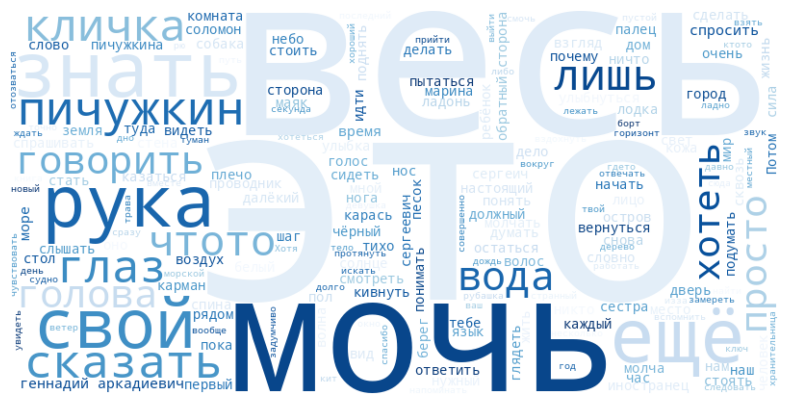

In [11]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues',
    contour_width=1,
    contour_color='black',
    max_words=200
).generate(' '.join(lemmatized_text_cleaned))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

output_path = '/content/wordcloud.png'
wordcloud.to_file(output_path)

#Распределение частей речи

In [12]:
def get_pos_distribution(text):
    pos_tags = [token.pos_ for token in nlp(text)]
    pos_counter = Counter(pos_tags)
    return pos_counter

pos_distribution = get_pos_distribution(text)
print(pos_distribution)

Counter({'PUNCT': 16501, 'NOUN': 12033, 'VERB': 11095, 'PRON': 7376, 'ADP': 5674, 'ADV': 5161, 'ADJ': 4094, 'PART': 3175, 'CCONJ': 2863, 'SPACE': 2669, 'DET': 1802, 'PROPN': 1604, 'SCONJ': 1498, 'AUX': 588, 'NUM': 343, 'INTJ': 38, 'X': 1})


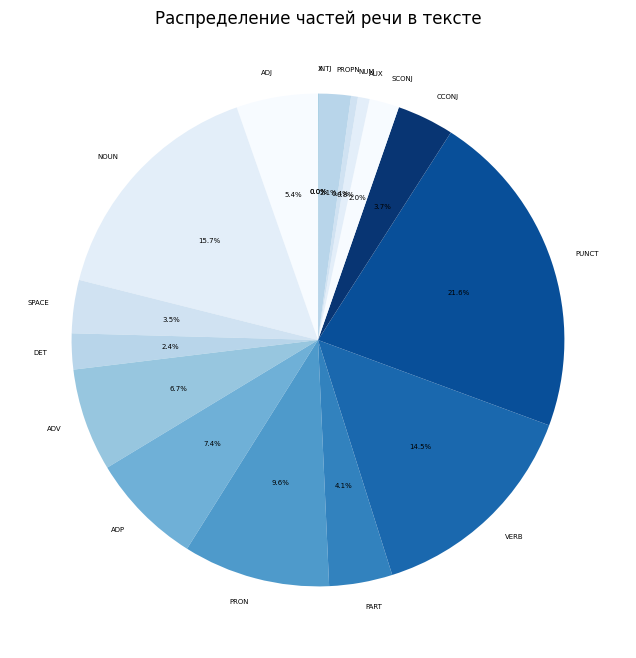

In [13]:
pos_labels = list(pos_distribution.keys())
pos_counts = list(pos_distribution.values())

plt.figure(figsize=(8, 8))
plt.pie(pos_counts, labels=pos_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Blues(range(0, 256, 25)), textprops={'fontsize': 5})
plt.title('Распределение частей речи в тексте')

pos_output_path = '/content/pos_distribution.png'
plt.savefig(pos_output_path)

plt.show()

#Частотность глаголов


In [14]:
verbs = [token.lemma_ for token in nlp(text) if token.pos_ == 'VERB']
verb_counter = Counter(verbs)
top_verbs = verb_counter.most_common(10)
verbs, counts = zip(*top_verbs)

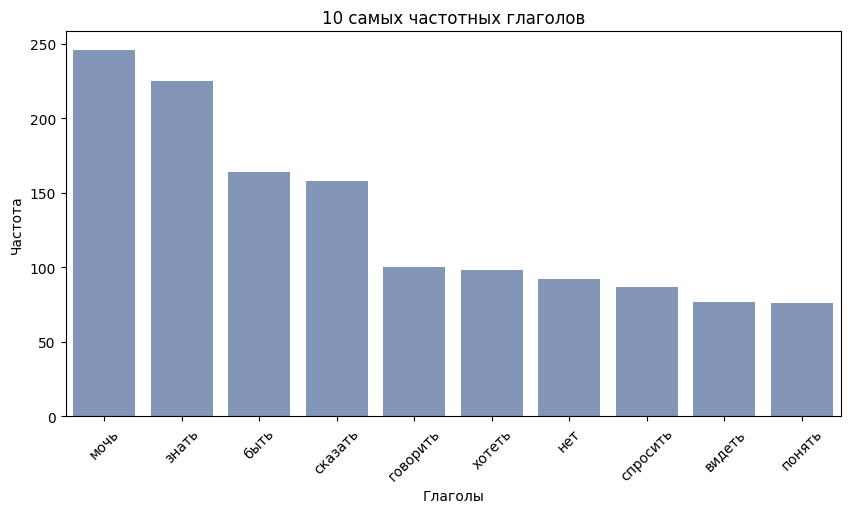

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(verbs), y=list(counts), color='#7b93c0')

plt.xticks(rotation=45)
plt.title('10 самых частотных глаголов')
plt.xlabel('Глаголы')
plt.ylabel('Частота')

output_path = '/content/verbs.png'
plt.savefig(output_path)

plt.show()

#Частотность существительных

In [16]:
nouns = [token.lemma_ for token in nlp(text) if token.pos_ == 'NOUN']
noun_counter = Counter(nouns)
top_nouns = noun_counter.most_common(10)
nouns, counts = zip(*top_nouns)

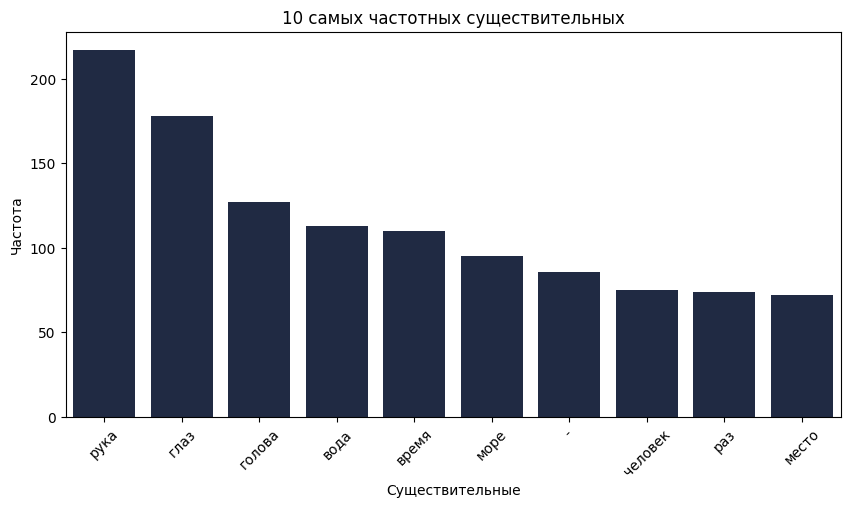

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(nouns), y=list(counts), color='#1A2849')

plt.xticks(rotation=45)
plt.title('10 самых частотных существительных')
plt.xlabel('Существительные')
plt.ylabel('Частота')

output_path = '/content/nouns.png'
plt.savefig(output_path)

plt.show()

#Частотность прилагательных

In [18]:
adjs = [token.lemma_ for token in nlp(text) if token.pos_ == 'ADJ']
adj_counter = Counter(adjs)
top_adjs = adj_counter.most_common(10)
adjs, counts = zip(*top_adjs)

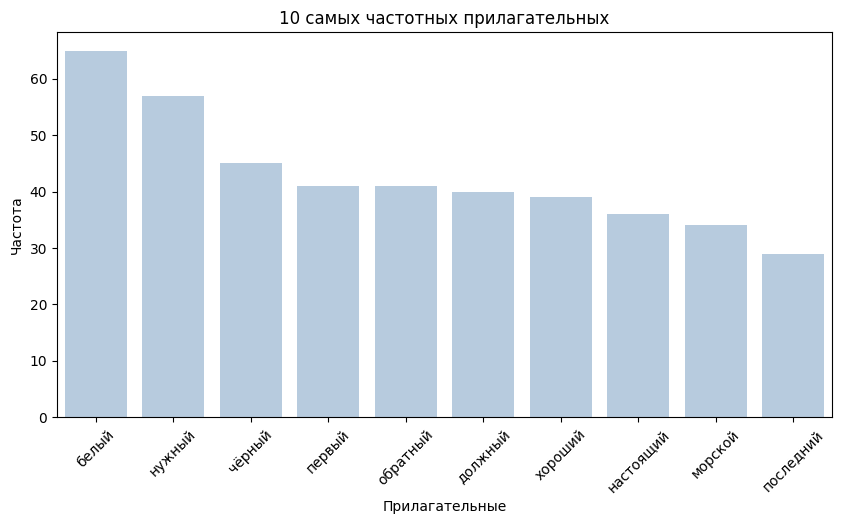

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(adjs), y=list(counts), color='#B0CBE5')

plt.xticks(rotation=45)
plt.title('10 самых частотных прилагательных')
plt.xlabel('Прилагательные')
plt.ylabel('Частота')

output_path = '/content/adjs.png'
plt.savefig(output_path)

plt.show()